In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 6.1MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=78c2ca7fe5e3c42bd0904e824c74390fdfe8e63e024565f1581132229382a2e5
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions download siim-covid19-detection -p /content/drive/MyDrive/KaggleDatasets/CovidDetection

100% 83.2G/83.2G [17:55<00:00, 109MB/s]
100% 83.2G/83.2G [17:55<00:00, 83.1MB/s]


In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import zipfile

In [ ]:
zip_ref = zipfile.ZipFile("/content/drive/MyDrive/KaggleDatasets/CovidDetection/siim-covid19-detection.zip", 'r')
zip_ref.extractall("/content/drive/MyDrive/KaggleDatasets/CovidDetection/")
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm

In [ ]:
training_img_path = '/content/drive/MyDrive/KaggleDatasets/CovidDetection/train/'
testing_img_path = '/content/drive/MyDrive/KaggleDatasets/CovidDetection/test/'
image_level_ds_path = '/content/drive/MyDrive/KaggleDatasets/CovidDetection/train_image_level.csv'
study_level_ds_path = '/content/drive/MyDrive/KaggleDatasets/CovidDetection/train_study_level.csv'

In [ ]:
image_level_df = pd.read_csv(image_level_ds_path)
image_level_df['id'] = image_level_df.apply(lambda row: row.id.split('_')[0], axis=1)
image_level_df.head()

,id,boxes,label,StudyInstanceUID
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e


In [ ]:
image_level_df.shape

(6334, 4)

In [ ]:
image_level_df['StudyInstanceUID'].unique().shape

(6054,)

In [ ]:
image_level_df.isna().sum()

id                     0
boxes               2040
label                  0
StudyInstanceUID       0
dtype: int64

In [ ]:
study_level_df = pd.read_csv(study_level_ds_path)
study_level_df['id'] = study_level_df.apply(lambda r: r.id.split('_')[0], axis=1)
study_level_df.head()

,id,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,00086460a852,0,1,0,0
1,000c9c05fd14,0,0,0,1
2,00292f8c37bd,1,0,0,0
3,005057b3f880,1,0,0,0
4,0051d9b12e72,0,0,0,1


In [ ]:
study_level_df.shape

(6054, 5)

In [ ]:
study_level_df.id.unique().shape

(6054,)

In [ ]:
study_level_df.isna().sum()

id                          0
Negative for Pneumonia      0
Typical Appearance          0
Indeterminate Appearance    0
Atypical Appearance         0
dtype: int64

In [ ]:
image_level_df_dd = image_level_df.drop_duplicates(subset=['StudyInstanceUID'],keep='last')
image_level_df_dd.shape

(6054, 4)

In [ ]:
merged_df = image_level_df_dd.merge(study_level_df, left_on='StudyInstanceUID', right_on='id')
merged_df.head(10)

,id_x,boxes,label,StudyInstanceUID,id_y,Negative for Pneumonia,Typical Appearance,Indeterminate Appearance,Atypical Appearance
0,000a312787f2,"[{'x': 789.28836, 'y': 582.43035, 'width': 102...",opacity 1 789.28836 582.43035 1815.94498 2499....,5776db0cec75,5776db0cec75,0,1,0,0
1,000c3a3f293f,NaN,none 1 0 0 1 1,ff0879eb20ed,ff0879eb20ed,1,0,0,0
2,0012ff7358bc,"[{'x': 677.42216, 'y': 197.97662, 'width': 867...",opacity 1 677.42216 197.97662 1545.21983 1197....,9d514ce429a7,9d514ce429a7,0,1,0,0
3,001398f4ff4f,"[{'x': 2729, 'y': 2181.33331, 'width': 948.000...",opacity 1 2729 2181.33331 3677.00012 2785.33331,28dddc8559b2,28dddc8559b2,0,0,0,1
4,001bd15d1891,"[{'x': 623.23328, 'y': 1050, 'width': 714, 'he...",opacity 1 623.23328 1050 1337.23328 2156 opaci...,dfd9fdd85a3e,dfd9fdd85a3e,0,1,0,0
5,0022227f5adf,"[{'x': 1857.2065, 'y': 508.30565, 'width': 376...",opacity 1 1857.2065 508.30565 2233.23384 907.8...,84543edc24c2,84543edc24c2,0,0,1,0
6,0023f02ae886,NaN,none 1 0 0 1 1,2fa400b873f5,2fa400b873f5,1,0,0,0
7,002e9b2128d0,"[{'x': 276.72917, 'y': 627.42968, 'width': 910...",opacity 1 276.72917 627.42968 1187.31776 2283....,0717c8ac304f,0717c8ac304f,0,1,0,0
8,00326161e51e,"[{'x': 542.96057, 'y': 364.37257, 'width': 590...",opacity 1 542.96057 364.37257 1133.32317999999...,a81050391441,a81050391441,0,1,0,0
9,0044e449aae1,"[{'x': 1703.78756, 'y': 938.29333, 'width': 91...",opacity 1 1703.78756 938.29333 2614.8275599999...,b60f2d2cc642,b60f2d2cc642,0,1,0,0


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6054 entries, 0 to 6053
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   id_x                      6054 non-null   object
 1   boxes                     4205 non-null   object
 2   label                     6054 non-null   object
 3   StudyInstanceUID          6054 non-null   object
 4   id_y                      6054 non-null   object
 5   Negative for Pneumonia    6054 non-null   int64 
 6   Typical Appearance        6054 non-null   int64 
 7   Indeterminate Appearance  6054 non-null   int64 
 8   Atypical Appearance       6054 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 633.0+ KB


In [ ]:
merged_df.shape

(6054, 9)

In [ ]:
classes = list(merged_df.columns)[-4:]
count_dic = []
for c in classes:
  count_dic.append([c,(merged_df[c].values == 1).sum()])
count_df = pd.DataFrame(count_dic, columns=['columns','counts'])
count_df

,columns,counts
0,Negative for Pneumonia,1676
1,Typical Appearance,2855
2,Indeterminate Appearance,1049
3,Atypical Appearance,474


In [ ]:
np.save('classes.npy', np.array(classes))

In [ ]:
!cp classes.npy /content/drive/MyDrive/KaggleDatasets/CovidDetection/

In [ ]:
merged_df.isna().sum()

id_x                           0
boxes                       1849
label                          0
StudyInstanceUID               0
id_y                           0
Negative for Pneumonia         0
Typical Appearance             0
Indeterminate Appearance       0
Atypical Appearance            0
dtype: int64

In [ ]:
merged_df.boxes.fillna("[{'x': 0, 'y': 0, 'width': 0, 'height': 0}]", inplace=True)

In [ ]:
merged_df.isna().sum()

id_x                        0
boxes                       0
label                       0
StudyInstanceUID            0
id_y                        0
Negative for Pneumonia      0
Typical Appearance          0
Indeterminate Appearance    0
Atypical Appearance         0
dtype: int64

In [ ]:
targets = merged_df.iloc[:, -4:].values
targets.shape

(6054, 4)

In [45]:
!pip install pydicom

     |████████████████████████████████| 1.9 MB 9.0 MB/s 


In [46]:
!pip install h5py

In [49]:
!pip install pylibjpeg pylibjpeg-libjpeg 

     |████████████████████████████████| 4.2 MB 13.2 MB/s 
     |████████████████████████████████| 3.6 MB 75.0 MB/s 
     |████████████████████████████████| 884 kB 43.5 MB/s 


In [47]:
import cv2
import matplotlib.pyplot as plt
from skimage.color import gray2rgb
import pydicom as dicom
from pydicom import dcmread
import numpy as np



```
if i < 10:
    dcm_path = f'{traini_l1_paths[i]}{row[0]}.dcm'
    print(dcm_path)
    bboxs = eval(row[1])
    print(list(bboxs[0].values()))
    print(targets[i])
  else:
    break
```





```
# This error code

image_data = []
image_names = []
bbox_targets = []
clf_targets = []
for i, row in tqdm(enumerate(merged_df.values)):
  bboxs = eval(row[1])
  bbox_targets.append(list(bboxs[0].values()))
  clf_targets.append(targets[i])
  image_names.append(row[0])
  dcm_path = f'{traini_l1_paths[i]}{row[0]}.dcm'
  ds = dicom.dcmread(dcm_path)
  image = np.array(ds.pixel_array)
  image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
  image_data.append(image)
```



In [ ]:
image_size = (224,224)

In [ ]:
image_data = []
image_names = []
bbox_targets = []
clf_targets = []
for i, row in tqdm(enumerate(merged_df.values)):
  try:
    l1_path = f'{training_img_path}{row[3]}' # creating path for fetching image l1
    l2_path = glob(f'{l1_path}/*') # creating path for fetching image l2
    dcm_path = f'{l2_path[0]}/{row[0]}.dcm' # creating final path for fetching image
    ds = dcmread(dcm_path) # reading image from the created path
    image = np.array(ds.pixel_array) # converting image pixels into numpy array
    ih, iw = image.shape
    bboxs = eval(row[1]) #converting String into list of dict
    x,y,w,h = list(bboxs[0].values())
    x,y,w,h = (x/iw),(y/ih),(w/iw),(h/ih)
    image = cv2.resize(image, image_size) # resizing image
    image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) #convert to 3 channel
    image_data.append(image) # appending the converted image to data
    bbox_targets.append([x,y,w,h]) # getting first dict value and getting its value for bbox
    image_names.append(row[0]) # adding file name to the processed data
    clf_targets.append(targets[i]) # adding one hot encode target values to the perticular images
  except:
    pass
 

/usr/local/lib/python3.7/dist-packages/pydicom/pixel_data_handlers/numpy_handler.py:341: UserWarning: The length of the pixel data in the dataset (13262360 bytes) indicates it contains excess padding. 216296 bytes will be removed from the end of the data
  warnings.warn(msg)


In [ ]:
import h5py

In [ ]:
dt = h5py.special_dtype(vlen=str)
image_data = np.array(image_data, dtype="float32")
image_names = np.array(image_names, dtype=dt)
bbox_targets = np.array(bbox_targets, dtype="float32")
clf_targets = np.array(clf_targets)

In [ ]:
image_data.shape, image_names.shape, bbox_targets.shape, clf_targets.shape

((5592, 224, 224, 3), (5592,), (5592, 4), (5592, 4))

In [ ]:
with h5py.File("CovidDetectionTrainingData.h5", 'w') as f:
  f.create_dataset("data_images", data=image_data)
  f.create_dataset("data_target_cc", data=clf_targets)
  f.create_dataset("data_targets_bbox", data=bbox_targets)
  f.create_dataset("data_file_names", data=image_names)

In [ ]:
!cp CovidDetectionTrainingData.h5 /content/drive/MyDrive/KaggleDatasets/CovidDetection/

In [ ]:
i = 6
targets[i][np.argmax(targets[i])],np.argmax(targets[i]),classes[np.argmax(targets[i])]

(1, 0, 'Negative for Pneumonia')

In [ ]:
clf_targets[6], bbox_targets[6]

(array([1, 0, 0, 0]), array([0., 0., 0., 0.], dtype=float32))

### **<u>Processing Data and Model Building</u>**

In [ ]:
import pandas as pd
import numpy as np
import h5py
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, LabelBinarizer, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dense, Activation, Flatten, Dropout, Input
from tensorflow.keras.applications import VGG19 as PTM_19, VGG16 as PTM_16
from keras.models import Sequential
from keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam as adm , SGD as sgd
from tensorflow.keras.applications.vgg16 import preprocess_input as input16
from tensorflow.keras.applications.vgg19 import preprocess_input as input19
import matplotlib.patches as patches
from keras.utils.vis_utils import plot_model
import tensorflow as tf
from tqdm.notebook import tqdm 

In [ ]:
def show_top_images_with_lables(images, lables, plot_random=True):
  columns = 4
  rows = 5
  fig=plt.figure(figsize=(12, 17))
  for i in range(1, columns*rows +1):
    index = None
    if plot_random == True:
      index = randint(0, (len(lables)-1))
    else:
      index = i
    fig.add_subplot(rows, columns, i).set_title(lables[index-1])
    plt.imshow((images[index-1] * 255), cmap='gray')
  return plt.show()

In [ ]:
h5file_path = '/content/drive/MyDrive/KaggleDatasets/CovidDetection/CovidDetectionTrainingData.h5'
classes_file_path = '/content/drive/MyDrive/KaggleDatasets/CovidDetection/classes.npy'

In [ ]:
h5Dataset = h5py.File(h5file_path, 'r')
classes = np.load(classes_file_path)

In [ ]:
h5Dataset.keys()

<KeysViewHDF5 ['data_file_names', 'data_images', 'data_target_cc', 'data_targets_bbox']>

In [ ]:
data_file_names = h5Dataset["data_file_names"][:]
data_images = h5Dataset["data_images"][:]
data_target_cc = h5Dataset["data_target_cc"][:]
data_targets_bbox = h5Dataset["data_targets_bbox"][:]
data_file_names.shape, data_images.shape, data_target_cc.shape, data_targets_bbox.shape

((5592,), (5592, 224, 224, 3), (5592, 4), (5592, 4))

In [ ]:
data_images = input16(data_images)

In [ ]:
# put together our model which accept an input image and then output
# bounding box coordinates and a class label
ptm_16 = PTM_16(weights="imagenet", include_top=False, input_tensor=Input(shape=(224, 224, 3)))

ptm_16.trainable = False # freeze all VGG16 layers so they will not be updated during the training process
flatten = ptm_16.output 
flatten = Flatten()(flatten)  #flatten the max-pooling output of VGG16

# construct a fully-connected layer header to output the predicted
# bounding box coordinates
bbox_layer = Dense(256, activation="relu")(flatten)
bbox_layer = Dense(128, activation="relu")(bbox_layer)
bbox_layer = Dense(64, activation="relu")(bbox_layer)
bbox_layer = Dense(4, activation="sigmoid", name="bounding_box_layer")(bbox_layer)

# construct a second fully-connected layer head, this one to predict
# the class label
classification_layer = Dense(512, activation="relu")(flatten)
classification_layer = Dropout(0.5)(classification_layer)
classification_layer = Dense(512, activation="relu")(classification_layer)
classification_layer = Dropout(0.5)(classification_layer)
classification_layer = Dense(4, activation="softmax", name="classification_layer")(classification_layer)

model = Model(inputs=ptm_16.input, outputs=(bbox_layer, classification_layer))

In [ ]:
training_testing_split = train_test_split(data_images, data_target_cc, data_targets_bbox, data_file_names, test_size=0.3, random_state=42)
X_train_images, X_test_images = training_testing_split[:2]
y_train_clf, y_test_clf = training_testing_split[2:4]
y_train_bbox, y_test_bbox = training_testing_split[4:6]
fn_train, fn_test = training_testing_split[6:]

In [ ]:
X_train_images.shape, X_test_images.shape, y_train_clf.shape, y_test_clf.shape, y_train_bbox.shape, y_test_bbox.shape, fn_train.shape, fn_test.shape

((3914, 224, 224, 3),
 (1678, 224, 224, 3),
 (3914, 4),
 (1678, 4),
 (3914, 4),
 (1678, 4),
 (3914,),
 (1678,))

In [ ]:
del data_images, data_target_cc, data_targets_bbox, data_file_names

In [ ]:
# define a dictionary to set the loss methods
# cross-entropy for the classification layers and mean absolute error
# for the bounding box layers,binary_crossentropy
losses = {
	"classification_layer": "categorical_crossentropy", 
	"bounding_box_layer": "mean_squared_error"
}

In [ ]:
# construct a dictionary for our target training outputs
y_train = {
	"classification_layer": y_train_clf,
	"bounding_box_layer": y_train_bbox
}
# construct a second dictionary, this one for our target testing
# outputs
y_test = {
	"classification_layer": y_test_clf,
	"bounding_box_layer": y_test_bbox
}

In [ ]:
optimizer = adm(learning_rate=1e-4)
model.compile(loss=losses, optimizer=optimizer, metrics=["accuracy"])

In [ ]:
with tf.device("/device:GPU:0"):
  history = model.fit(X_train_images, y_train, validation_data=(X_test_images, y_test), batch_size=10, epochs=10)

Epoch 1/10
392/392 [==============================] - 13s 29ms/step - loss: 186.5377 - bounding_box_layer_loss: 0.1507 - classification_layer_loss: 186.3870 - bounding_box_layer_accuracy: 0.4169 - classification_layer_accuracy: 0.4073 - val_loss: 70.7341 - val_bounding_box_layer_loss: 0.0889 - val_classification_layer_loss: 70.6451 - val_bounding_box_layer_accuracy: 0.5024 - val_classification_layer_accuracy: 0.2592
Epoch 2/10
392/392 [==============================] - 11s 28ms/step - loss: 31.3822 - bounding_box_layer_loss: 0.0901 - classification_layer_loss: 31.2921 - bounding_box_layer_accuracy: 0.5114 - classification_layer_accuracy: 0.5258 - val_loss: 43.7937 - val_bounding_box_layer_loss: 0.0888 - val_classification_layer_loss: 43.7049 - val_bounding_box_layer_accuracy: 0.5083 - val_classification_layer_accuracy: 0.4702
Epoch 3/10
392/392 [==============================] - 11s 28ms/step - loss: 21.6634 - bounding_box_layer_loss: 0.0902 - classification_layer_loss: 21.5732 - bound

In [ ]:
def create_model(input_shape, n_classes, optimizer='rmsprop', fine_tune=0):
    """
    Compiles a model integrated with VGG16 pretrained layers
    
    input_shape: tuple - the shape of input images (width, height, channels)
    n_classes: int - number of classes for the output layer
    optimizer: string - instantiated optimizer to use for training. Defaults to 'RMSProp'
    fine_tune: int - The number of pre-trained layers to unfreeze.
                If set to 0, all pretrained layers will freeze during training
    """
    
    # Pretrained convolutional layers are loaded using the Imagenet weights.
    # Include_top is set to False, in order to exclude the model's fully-connected layers.
    conv_base = PTM_16(include_top=False,
                     weights='imagenet', 
                     input_shape=input_shape)
    
    # Defines how many layers to freeze during training.
    # Layers in the convolutional base are switched from trainable to non-trainable
    # depending on the size of the fine-tuning parameter.
    if fine_tune > 0:
        for layer in conv_base.layers[:-fine_tune]:
            layer.trainable = False
    else:
        for layer in conv_base.layers:
            layer.trainable = False

    # Create a new 'top' of the model (i.e. fully-connected layers).
    # This is 'bootstrapping' a new top_model onto the pretrained layers.
    top_model = conv_base.output
    top_model = Flatten(name="flatten")(top_model)
    top_model = Dense(4096, activation='relu')(top_model)
    #top_model = Dropout(0.2)(top_model)
    top_model = Dense(1072, activation='relu')(top_model)
    top_model = Dropout(0.2)(top_model)
    output_layer = Dense(n_classes, activation='softmax')(top_model)
    
    # Group the convolutional base and new fully-connected layers into a Model object.
    model = Model(inputs=conv_base.input, outputs=output_layer)

    # Compiles the model for training.
    model.compile(optimizer=optimizer, 
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    return model


In [ ]:
input_shape = (224, 224, 3)
optim_1 = adm(learning_rate=0.001)
n_classes=4

# First we'll train the model without Fine-tuning
model_16 = create_model(input_shape, n_classes, optim_1, fine_tune=0)

In [ ]:
model_16.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 121,875,508
Trainable params: 107,160,820
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
with tf.device("/device:GPU:0"):
  hist = model_16.fit(X_train_images, y_train_clf, validation_data=(X_test_images, y_test_clf), batch_size=18, epochs=20, verbose=1)

Epoch 1/20
218/218 [==============================] - 25s 56ms/step - loss: 1480.5960 - accuracy: 0.3974 - val_loss: 40.5846 - val_accuracy: 0.2902
Epoch 2/20
218/218 [==============================] - 11s 50ms/step - loss: 55.1132 - accuracy: 0.4833 - val_loss: 31.0500 - val_accuracy: 0.3456
Epoch 3/20
218/218 [==============================] - 11s 50ms/step - loss: 14.2953 - accuracy: 0.5322 - val_loss: 10.5706 - val_accuracy: 0.5465
Epoch 4/20
218/218 [==============================] - 11s 50ms/step - loss: 5.2178 - accuracy: 0.5773 - val_loss: 8.0583 - val_accuracy: 0.4619
Epoch 5/20
218/218 [==============================] - 11s 50ms/step - loss: 2.8608 - accuracy: 0.6340 - val_loss: 5.4417 - val_accuracy: 0.5268
Epoch 6/20
218/218 [==============================] - 11s 50ms/step - loss: 1.2226 - accuracy: 0.7287 - val_loss: 5.5410 - val_accuracy: 0.4660
Epoch 7/20
218/218 [==============================] - 11s 50ms/step - loss: 0.7255 - accuracy: 0.7762 - val_loss: 6.2627 - val_a

In [ ]:
hist = hist.history

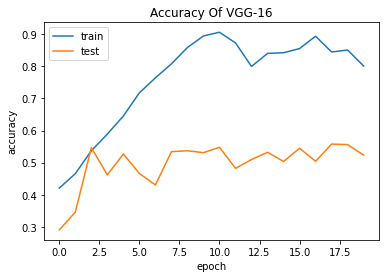

In [ ]:
# summarize history for accuracy
plt.plot(hist['accuracy'])
plt.plot(hist['val_accuracy'])
plt.title('Accuracy Of VGG-16')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

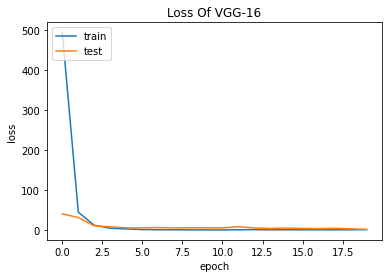

In [ ]:
# summarize history for loss
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.title('Loss Of VGG-16')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#**VGG-19**

In [ ]:
mtf = tf.keras.callbacks

In [ ]:
GPU_DEVICE="/device:GPU:0"

In [ ]:
ptm_19 = PTM_19(weights='imagenet', 
            include_top=False, pooling='avg')
ptm_19.trainable = False

80142336/80134624 [==============================] - 0s 0us/step


In [ ]:
ptm_19.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

In [ ]:
training_features_19 = []
print("Extracting Training Features ...")
for train_image_19 in tqdm(X_train_images):
  with tf.device(GPU_DEVICE):
    img_19 = np.expand_dims(train_image_19, axis=0)
    training_feature_19 = ptm_19.predict(input19(img_19))[0]
    training_features_19.append(training_feature_19)
training_features_19 = np.array(training_features_19)
print("Done Extracting Training Features.")

Extracting Training Features ...



Done Extracting Training Features.


In [ ]:
training_features_19.shape

(3914, 512)

In [ ]:
testing_features_19 = []
print("Extracting Testing Features ...")
for test_image_19 in tqdm(X_test_images):
  with tf.device(GPU_DEVICE):
    tst_img_19 = np.expand_dims(test_image_19, axis=0)
    testing_feature_19 = ptm_19.predict(input19(tst_img_19))[0]
    testing_features_19.append(testing_feature_19)
testing_features_19 = np.array(testing_features_19)
print("Done Extracting Testing Features.")

Extracting Testing Features ...



Done Extracting Testing Features.


In [ ]:
testing_features_19.shape

(1678, 512)

In [ ]:
model_19_clf = Sequential([
    Dense(1024, input_shape=(512,)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(4),
    Activation('softmax'),
])

In [ ]:
adam_lr_clf = adm(learning_rate =1e-4,  beta_1=0.9, beta_2=0.999)
model_19_clf.compile(optimizer = adam_lr_clf, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model_19_bbox = Sequential([
    Dense(1024, input_shape=(512,)),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(512),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256),
    Activation('relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(4),
    Activation('sigmoid'),
])


In [ ]:
adam_lr_bbox = adm(learning_rate = 0.001, beta_1=0.9, beta_2=0.999, decay=0.001)
model_19_bbox.compile(loss='mean_squared_error', optimizer=adam_lr_bbox, metrics=['mean_absolute_error'])

In [ ]:
epochs = 63
batch_size = 8

In [ ]:
checkpoint_path = '/content/drive/MyDrive/KaggleDatasets/CovidDetection/VGG_19_Weights/Classification_model/weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5'
model_checkpoint_callback = mtf.ModelCheckpoint(filepath=checkpoint_path,
                                                save_weights_only=True,
                                                monitor='val_accuracy',
                                                mode='max',
                                                save_best_only=True)

In [ ]:
with tf.device(GPU_DEVICE):
  history_clf = model_19_clf.fit(training_features_19, y_train_clf,
                                 validation_data=(testing_features_19, y_test_clf),
                                 batch_size=batch_size,
                                 epochs=epochs, verbose=1, shuffle=True, )#, shuffle=True, callbacks=[model_checkpoint_callback])

Epoch 1/63
490/490 [==============================] - 20s 6ms/step - loss: 2.1565 - accuracy: 0.2607 - val_loss: 1.3602 - val_accuracy: 0.3194
Epoch 2/63
490/490 [==============================] - 2s 5ms/step - loss: 1.8165 - accuracy: 0.3130 - val_loss: 1.3368 - val_accuracy: 0.3516
Epoch 3/63
490/490 [==============================] - 2s 5ms/step - loss: 1.7109 - accuracy: 0.3265 - val_loss: 1.3668 - val_accuracy: 0.3647
Epoch 4/63
490/490 [==============================] - 2s 5ms/step - loss: 1.6275 - accuracy: 0.3598 - val_loss: 1.3133 - val_accuracy: 0.3903
Epoch 5/63
490/490 [==============================] - 2s 5ms/step - loss: 1.5511 - accuracy: 0.3797 - val_loss: 1.2567 - val_accuracy: 0.4934
Epoch 6/63
490/490 [==============================] - 2s 5ms/step - loss: 1.4787 - accuracy: 0.4055 - val_loss: 1.2785 - val_accuracy: 0.4154
Epoch 7/63
490/490 [==============================] - 3s 5ms/step - loss: 1.4220 - accuracy: 0.4156 - val_loss: 1.2846 - val_accuracy: 0.4011
Epoch

In [ ]:
history_clf_19 = history_clf.history

VGG_19 CLASSIFICATION ACCURACY GRAPH


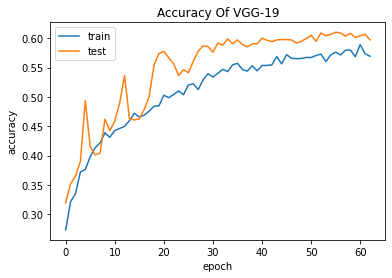

In [ ]:
print("VGG_19 CLASSIFICATION ACCURACY GRAPH")
plt.plot(history_clf_19['accuracy'])
plt.plot(history_clf_19['val_accuracy'])
plt.title('Accuracy Of VGG-19')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

VGG_19 CLASSIFICATION LOSS GRAPH


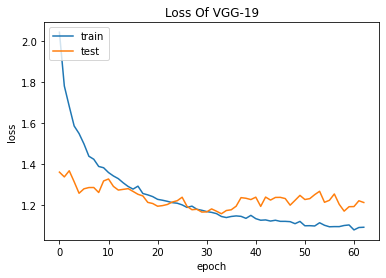

In [ ]:
print("VGG_19 CLASSIFICATION LOSS GRAPH")
plt.plot(history_clf_19['loss'])
plt.plot(history_clf_19['val_loss'])
plt.title('Loss Of VGG-19')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
evaluation_19 = model_19_clf.evaluate(testing_features_19, y_test_clf)

53/53 [==============================] - 0s 2ms/step - loss: 1.2114 - accuracy: 0.5971


In [ ]:
model_19_clf.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_44 (ModuleWra (None, 1024)              525312    
_________________________________________________________________
module_wrapper_45 (ModuleWra (None, 1024)              0         
_________________________________________________________________
module_wrapper_46 (ModuleWra (None, 1024)              4096      
_________________________________________________________________
module_wrapper_47 (ModuleWra (None, 1024)              0         
_________________________________________________________________
module_wrapper_48 (ModuleWra (None, 512)               524800    
_________________________________________________________________
module_wrapper_49 (ModuleWra (None, 512)               0         
_________________________________________________________________
module_wrapper_50 (ModuleWra (None, 512)              

In [ ]:
with tf.device(GPU_DEVICE):
  history_bbox = model_19_bbox.fit(training_features_19, y_train_bbox, verbose=1, batch_size=batch_size, epochs=epochs, validation_data=(testing_features_19, y_test_bbox))

Epoch 1/63
490/490 [==============================] - 6s 6ms/step - loss: 0.1281 - mean_absolute_error: 0.2816 - val_loss: 0.0551 - val_mean_absolute_error: 0.1794
Epoch 2/63
490/490 [==============================] - 2s 5ms/step - loss: 0.0580 - mean_absolute_error: 0.1886 - val_loss: 0.0478 - val_mean_absolute_error: 0.1712
Epoch 3/63
490/490 [==============================] - 2s 5ms/step - loss: 0.0535 - mean_absolute_error: 0.1828 - val_loss: 0.0444 - val_mean_absolute_error: 0.1684
Epoch 4/63
490/490 [==============================] - 2s 5ms/step - loss: 0.0489 - mean_absolute_error: 0.1762 - val_loss: 0.0429 - val_mean_absolute_error: 0.1649
Epoch 5/63
490/490 [==============================] - 2s 5ms/step - loss: 0.0464 - mean_absolute_error: 0.1715 - val_loss: 0.0410 - val_mean_absolute_error: 0.1631
Epoch 6/63
490/490 [==============================] - 2s 5ms/step - loss: 0.0439 - mean_absolute_error: 0.1687 - val_loss: 0.0395 - val_mean_absolute_error: 0.1604
Epoch 7/63
490/4

In [25]:
history_bbox_19 = history_bbox.history

VGG_19 BOUNDING BOX REGRESSION LOSS GRAPH


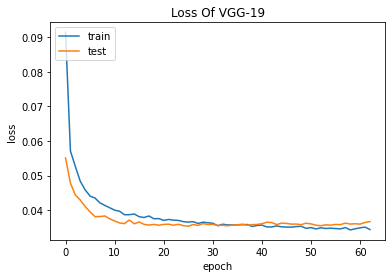

In [26]:
print("VGG_19 BOUNDING BOX REGRESSION LOSS GRAPH")
plt.plot(history_bbox_19['loss'])
plt.plot(history_bbox_19['val_loss'])
plt.title('Loss Of VGG-19')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

VGG_19 BOUNDING BOX REGRESSION MEAN ABSOLUTE ERROR GRAPH


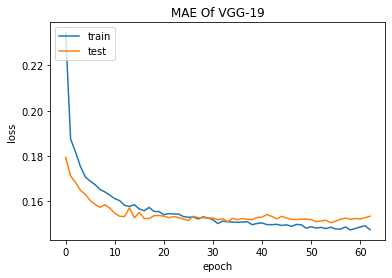

In [27]:
print("VGG_19 BOUNDING BOX REGRESSION MEAN ABSOLUTE ERROR GRAPH")
plt.plot(history_bbox_19['mean_absolute_error'])
plt.plot(history_bbox_19['val_mean_absolute_error'])
plt.title('MAE Of VGG-19')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
model_19_bbox.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_66 (ModuleWra (None, 1024)              525312    
_________________________________________________________________
module_wrapper_67 (ModuleWra (None, 1024)              0         
_________________________________________________________________
module_wrapper_68 (ModuleWra (None, 1024)              4096      
_________________________________________________________________
module_wrapper_69 (ModuleWra (None, 1024)              0         
_________________________________________________________________
module_wrapper_70 (ModuleWra (None, 512)               524800    
_________________________________________________________________
module_wrapper_71 (ModuleWra (None, 512)               0         
_________________________________________________________________
module_wrapper_72 (ModuleWra (None, 512)              

In [41]:
index = 160
test_img = testing_features_19[index]
test_img = np.expand_dims(test_img, axis=0)
pred_clf = model_19_clf.predict(test_img)
pred_bbox = model_19_bbox.predict(test_img)

In [42]:
pred_clf[0], y_test_clf[index], pred_bbox[0], y_test_bbox[index]

(array([0.10863394, 0.5771643 , 0.22486782, 0.08933393], dtype=float32),
 array([0, 1, 0, 0]),
 array([0.27284944, 0.2424121 , 0.21179007, 0.38773298], dtype=float32),
 array([0.31237054, 0.14926209, 0.23004484, 0.484207  ], dtype=float32))

In [30]:
classes[np.argmax(pred_clf[0])], pred_clf[0][np.argmax(pred_clf[0])]*100

('Typical Appearance', 44.192853569984436)

In [ ]:
model_19_bbox.save_weights('Model_19_bbox_weights_60_epochs_with_htp.h5')
model_19_clf.save_weights('Model_19_clf_weights_60_epochs_with_htp.h5')

In [ ]:
!mv /content/Model_19_bbox_weights_60_epochs_with_htp.h5 /content/drive/MyDrive/KaggleDatasets/CovidDetection/
!mv /content/Model_19_clf_weights_60_epochs_with_htp.h5 /content/drive/MyDrive/KaggleDatasets/CovidDetection/

In [31]:
testing_img_path = '/content/drive/MyDrive/KaggleDatasets/CovidDetection/test/'

In [32]:
pred_images_fp = glob(f'{testing_img_path}*/*/*')

In [36]:
pred_images_fp[0]

'/content/drive/MyDrive/KaggleDatasets/CovidDetection/test/e8d137c213a0/194bc96e3aea/366e7eb393e5.dcm'

In [33]:
image_size = (224,224)

In [ ]:
model_19_clf.load_weights("/content/drive/MyDrive/KaggleDatasets/CovidDetection/Model_19_clf_weights_60_epochs_with_htp.h5")
model_19_bbox.load_weights("/content/drive/MyDrive/KaggleDatasets/CovidDetection/Model_19_bbox_weights_60_epochs_with_htp.h5")

In [50]:
results = []
for pred_img_fp in tqdm(pred_images_fp):
  try:
    with tf.device(GPU_DEVICE):
      sutdy_id = f'{pred_img_fp.split("/")[7]}_study'
      ds = dcmread(pred_img_fp) # reading image from the created path
      image = np.array(ds.pixel_array) # converting image pixels into numpy array
      image = cv2.resize(image, image_size) # resizing image
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB) #convert to 3 channel
      image = np.expand_dims(image, axis=0)
      image = ptm_19.predict(input19(image))[0]
      image = np.expand_dims(image, axis=0)
      clf_pred = model_19_clf.predict(image)
      clf_pred_val = clf_pred[0]
      clf_pred_val = np.argmax(clf_pred_val)
      class_pred = classes[clf_pred_val]
      confidence = clf_pred[0][clf_pred_val]
      bbox = model_19_bbox.predict(image)
      x,y,w,h = bbox[0]
      pred_str = None
      if class_pred == classes[0]:
        pred_str = f'{class_pred} {confidence} 0 0 0 0'
      else:
        pred_str = f'{class_pred} {confidence} {x} {y} {w} {h}'
      results.append([sutdy_id, pred_str])
  except:
    pass#print("Exception Occured")

In [51]:
dataframe = pd.DataFrame(results, columns=['id', 'PredictionString'])
dataframe.head(50)

,id,PredictionString
0,e8d137c213a0_study,Negative for Pneumonia 0.49798160791397095 0 0...
1,14be2e12c7cf_study,Typical Appearance 0.38487163186073303 0.24985...
2,32d24b5596d7_study,Typical Appearance 0.4353284537792206 0.280723...
3,df4910ccf64b_study,Negative for Pneumonia 0.6537365913391113 0 0 0 0
4,098be79259d5_study,Typical Appearance 0.42059966921806335 0.28198...
5,cc874d5c6431_study,Typical Appearance 0.35258251428604126 0.25475...
6,20ead06f3576_study,Negative for Pneumonia 0.5836619734764099 0 0 0 0
7,6ed0d449ff97_study,Negative for Pneumonia 0.39194032549858093 0 0...
8,c0924d22f592_study,Negative for Pneumonia 0.5366577506065369 0 0 0 0
9,119e45ffb508_study,Typical Appearance 0.43245232105255127 0.28512...


In [52]:
dataframe.to_csv("Submission.csv", index=False)